In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!pip install detecto

In [ ]:
from detecto.core import Model
labels = ['hstroke']
model = Model.load('gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Neural_Networks/ResNet/Resnet_weights_50epoch.pth', labels)

In [ ]:
import os
tp = os.path.abspath(os.path.join('gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/'))

In [ ]:
from detecto.core import Dataset
test_set = Dataset(tp)

In [ ]:
print(len(test_set))
print(test_set)

300


In [ ]:
from os import listdir
listdir(tp)

In [ ]:
pth = tp + '/IMG-129.png'
print(pth)

/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-129.png


In [ ]:
from detecto.utils import read_image
img = read_image(pth)

In [ ]:
labels, boxes, scores = model.predict(img)

In [ ]:
import detecto.visualize
from detecto.visualize import show_labeled_image

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import torch
from detecto.utils import reverse_normalize, normalize_transform, _is_iterable
from torchvision import transforms

name="/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/predictions/detecto_figure_cut/default.png"

def ukaz(image, boxes, labels=None):  
  fig, ax = plt.subplots(1)
  # If the image is already a tensor, convert it back to a PILImage
  # and reverse normalize it
  if isinstance(image, torch.Tensor):
      image = reverse_normalize(image)
      image = transforms.ToPILImage()(image)
  ax.imshow(image)


  # Show a single box or multiple if provided
  if boxes.ndim == 1:
      boxes = boxes.view(1, 4)

  if labels is not None and not _is_iterable(labels):
      labels = [labels]

  # Plot each box
  for i in range(boxes.shape[0]):
      box = boxes[i]
      width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
      initial_pos = (box[0].item(), box[1].item())
      rect = patches.Rectangle(initial_pos,  width, height, linewidth=1,
                                 edgecolor='r', facecolor='none')
  #pridat ukladani souradnic box [0-3] do XML souboru!!

  
     # if labels:
     #     ax.text(box[0] + 5, box[1] - 5, '{}'.format(labels[i]), color='red')

      ax.add_patch(rect)
  #ax.imshow(image)
  plt.axis('off')
  #plt.show()
  plt.savefig(name, bbox_inches="tight", pad_inches=0)
  


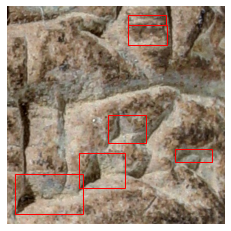

In [ ]:
ukaz(img, boxes, labels)

In [ ]:
print(len(labels))

6


In [ ]:
import glob
images = glob.glob(tp + '/*.png')
print (images)

['/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-132.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-130.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-141.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-145.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-135.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-129.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-136.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-142.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/IMG-127.png', '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_

In [ ]:
ims = [] 
print(len(images))

630


In [ ]:
for i in range (0,629):
  ims.append(read_image(images[i]))

In [ ]:
labelsimg = []
boxesimg = []
scoresimg = [] 

In [ ]:
from google.colab.patches import cv2_imshow
labels_detected = 0
for j in range (0,629):
  #cv2_imshow(ims[j])
  labels, boxes, scores = model.predict(ims[j])
  print(images[j])
  name = images[j] + "_pred.png"
  ukaz(ims[j], boxes, labels)
  print(scores)
  labels_detected = labels_detected + len(labels)
  print(labels_detected)

In [ ]:
from detecto import visualize
#visualize.plot_prediction_grid(model, ims, figsize=(200,200), dim=(41,2))
visualize.plot_prediction_grid(model, ims, figsize=(416,416), dim=(35,18))